In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv(r'D:\E drive\MCA\2nd Sem\It workshop II\Optimizing-Household-Electricity-through-Machine-Learning-main\Datasets\electricity_appliance_wise_data.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1[df1['Date'].dt.year == 2021]
df1.reset_index(drop=True, inplace=True)
df1.head(2)

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore
0,2021-01-01,1224.252,0.0,349294.64,3869.148,327.0,3558.0,1,2020,7.7,1,2304.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,1693.778,0.0,350829.71,5301.422,367.0,14623.0,1,2020,8.5,2,1111.0,NaN,NaN,NaN,NaN,NaN


In [3]:
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z

In [6]:
print(df1[['Fridge', 'Kitchen Appliances', 'AC', 'Other Appliances', 'Washing Machine']].describe())
print(df1.isnull().sum())  # Check for missing or invalid data


            Fridge  Kitchen Appliances           AC  Other Appliances  \
count   203.000000          203.000000   203.000000        203.000000   
mean   1525.037537         4907.779212  2933.758966       1594.171084   
std     498.982172         1554.741228  2180.702038       1933.680636   
min     131.732000          417.868000     0.000000          1.980000   
25%    1194.854000         3894.657000     0.000000        473.100000   
50%    1542.650000         4980.886000  3106.230000        637.230000   
75%    1816.058000         5879.900000  4328.915000       2171.100000   
max    2903.014000         9149.786000  8067.900000      11165.650000   

       Washing Machine  
count       203.000000  
mean       2000.251232  
std        3334.395082  
min           0.000000  
25%          10.500000  
50%        1078.000000  
75%        2123.500000  
max       20000.000000  
Date                   0
Fridge                 0
AC                     0
Voltage                0
Kitchen Appliance

In [8]:
df1.fillna(0, inplace=True)  # Replace missing values with 0


In [4]:
df1['kap_zscore'] = zscore(df1['Kitchen Appliances'], 30)
df1['fridge_zscore'] = zscore(df1['Fridge'], 30)
df1['ac_zscore'] = zscore(df1['AC'], 30)
df1['oap_zscore'] = zscore(df1['Other Appliances'], 30)
df1['wm_zscore'] = zscore(df1['Washing Machine'], 3)

In [5]:
df1[df1['kap_zscore'] > 5]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore


In [6]:
df1[df1['fridge_zscore'] > 5]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore


In [7]:
df1[df1['ac_zscore'] > 5]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore
56,2021-03-01,2083.454,2874.15,350992.12,6620.146,4880.25,10074.0,3,2020,60.9,1,3842.0,0.673283,0.663654,inf,1.216211,1.412839
57,2021-03-02,2903.014,2755.38,349038.83,9149.786,8457.82,21130.0,3,2020,76.5,2,2234.0,2.160376,2.180478,5.154957,2.557031,-0.164592


In [8]:
df1[df1['oap_zscore'] > 5]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore


In [9]:
df1[df1['wm_zscore'] > 3]

,Date,Fridge,AC,Voltage,Kitchen Appliances,Other Appliances,Sub_metering_3,month,year,Total_Consumption,day,Washing Machine,kap_zscore,fridge_zscore,ac_zscore,oap_zscore,wm_zscore
8,2021-01-09,1593.318,0.00,347418.49,5162.682,1194.00,13990.0,1,2020,9.9,9,1947.0,NaN,NaN,NaN,NaN,3.046567
27,2021-01-30,2842.728,0.00,348594.33,9119.672,7544.00,17891.0,1,2020,22.7,30,3240.0,NaN,NaN,NaN,NaN,5.342202
33,2021-02-05,2187.910,0.00,346159.08,7060.490,7966.00,14454.0,2,2020,19.1,5,1858.0,0.727257,0.653262,NaN,3.378153,inf
38,2021-02-10,1923.254,0.00,346612.98,6118.146,741.00,13532.0,2,2020,12.8,10,3972.0,0.184626,0.177368,NaN,-0.431927,8.164266
42,2021-02-15,2097.132,0.00,350563.36,6603.868,332.00,16065.0,2,2020,12.5,15,3468.0,0.356957,0.379214,NaN,-0.662260,3.204077
47,2021-02-20,1983.728,0.00,348176.11,6289.872,382.00,14470.0,2,2020,12.4,20,3748.0,0.237051,0.233801,NaN,-0.613829,3.308385
48,2021-02-21,2740.314,0.00,346500.54,8834.886,8142.00,17083.0,2,2020,25.6,21,5905.0,1.786216,1.675543,NaN,2.660617,3.176719
65,2021-03-10,1830.684,3042.21,348383.29,5943.116,2583.99,7738.0,3,2020,55.2,10,5000.0,0.391759,0.321174,1.631128,0.337466,10.576512
96,2021-04-11,2555.146,6310.95,350139.21,8239.254,11165.65,10286.0,4,2020,102.9,11,6029.0,2.126852,2.063797,2.247089,4.357294,4.248514
108,2021-04-24,1518.418,7670.95,347783.21,5084.582,1481.05,8223.0,4,2020,60.6,24,4445.0,-0.147180,-0.323908,3.562334,-0.212218,8.171678


In [10]:
import plotly.graph_objects as go
fig = go.Figure()
df_anoms = df1[df1['wm_zscore'] > 3]
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Washing Machine'],
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=df_anoms['Date'], y=df_anoms['Washing Machine'],
                    mode='markers',
                    name='lines'))
fig.update_layout(title='Anomalies detected in Washing Machine')


=== K-Means Clustering Metrics ===
                      Metric     Value
            Silhouette Score  0.310080
     Calinski-Harabasz Index 80.630662
Anomaly Threshold (95th pct)  2.495404

=== Detected Anomalies (11 rows) ===
      Date  Kitchen Appliances   Fridge      AC  Other Appliances  Washing Machine  Cluster  Distance
2021-01-27            8744.898 2760.902    0.00           6403.00           2044.0        2  3.164532
2021-01-30            9119.672 2842.728    0.00           7544.00           3240.0        2  3.778264
2021-02-05            7060.490 2187.910    0.00           7966.00           1858.0        2  3.052705
2021-02-21            8834.886 2740.314    0.00           8142.00           5905.0        2  3.987954
2021-03-02            9149.786 2903.014 2755.38           8457.82           2234.0        2  4.080765
2021-03-20             417.868  131.732  348.42              1.98              0.0        0  3.442295
2021-03-28            5868.186 1798.214 3906.42         

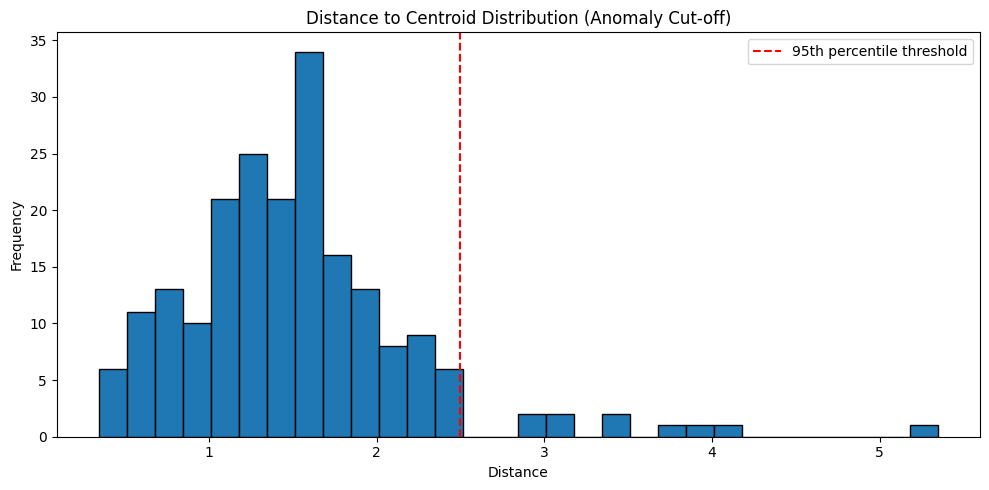

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# 1) Load and preprocess
csv_path = r'D:\E drive\MCA\2nd Sem\It workshop II\WattWise\Datasets\electricity_appliance_wise_data.csv'
df = pd.read_csv(csv_path, parse_dates=['Date'])
df = df[df['Date'].dt.year == 2021].reset_index(drop=True)

# 2) Feature matrix
features = ['Kitchen Appliances', 'Fridge', 'AC', 'Other Appliances', 'Washing Machine']
X = df[features].values

# 3) Standardize  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) Fit K-Means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# 5) Clustering metrics
sil_score = silhouette_score(X_scaled, labels)
ch_score  = calinski_harabasz_score(X_scaled, labels)

# 6) Anomaly detection by distance
distances = np.linalg.norm(X_scaled - centroids[labels], axis=1)
threshold = np.percentile(distances, 95)   # top 5% as anomalies
anomaly_mask = distances > threshold

# 7) Attach results
df['Cluster'] = labels
df['Distance'] = distances
df['Anomaly_KMeans'] = anomaly_mask

# 8) Print out the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Anomaly Threshold (95th pct)'],
    'Value' : [sil_score, ch_score, threshold]
})
print("\n=== K-Means Clustering Metrics ===")
print(metrics_df.to_string(index=False))

# 9) Print detected anomalies
anoms_df = df[df['Anomaly_KMeans']]
print(f"\n=== Detected Anomalies ({len(anoms_df)} rows) ===")
print(anoms_df[['Date'] + features + ['Cluster', 'Distance']].to_string(index=False))

# 10) Plot distance distribution
plt.figure(figsize=(10,5))
plt.hist(distances, bins=30, edgecolor='k')
plt.axvline(threshold, color='red', linestyle='--', label='95th percentile threshold')
plt.title('Distance to Centroid Distribution (Anomaly Cut-off)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import smtplib, ssl
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email import encoders
import plotly.graph_objects as go
import datetime
import pandas as pd

# Filter anomalies for washing machine
df_anoms_wm = df1[df1['wm_zscore'] > 3]

for i in df_anoms_wm['Date']:
    print(f"\nProcessing date: {i}")

    try:
        df_anoms_temp = df_anoms_wm[df_anoms_wm['Date'] == i].reset_index(drop=True)
        df_all_temp = df1[df1['Date'] <= i + datetime.timedelta(days=1)].reset_index(drop=True)

        if df_anoms_temp.empty or df_all_temp.empty:
            print(f"Empty data on {i}, skipping.")
            continue

        if df_all_temp['Washing Machine'].isnull().any():
            print(f"NaN values detected for {i}, skipping.")
            continue

        # Create plot
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=df_all_temp['Date'], y=df_all_temp['Washing Machine'], mode='lines', name='Actual Consumption'))
        fig.add_trace(go.Scatter(x=df_anoms_temp['Date'], y=df_anoms_temp['Washing Machine'], mode='markers', name='High Fluctuations'))
        fig.update_traces(marker=dict(size=5, line=dict(width=5, color='red')))

        # Save as HTML (bypasses Kaleido)
        i_str = pd.to_datetime(i).strftime('%Y-%m-%d')
        filename = f'output_file_{i_str}.html'
        fig.write_html(filename)
        print(f"Plot saved as {filename}")

        # Prepare email
        SUBJECT = f"Possible Detection of Faulty Device - Dated: {i_str}"
        msg = MIMEMultipart()
        msg['Subject'] = SUBJECT
        msg['From'] = 'freepinki2002@gmail.com'
        msg['To'] = 'pinkikri4079@gmail.com'

        body = "WattWise has detected a possible faulty device. This can cause a power outage/trip/excessive electricity consumption."
        msg.attach(MIMEText(body, 'plain'))

        with open(filename, "rb") as attachment:
            part = MIMEBase('application', "octet-stream")
            part.set_payload(attachment.read())
            encoders.encode_base64(part)
            part.add_header('Content-Disposition', f"attachment; filename={filename}")
            msg.attach(part)

        # Send email
        context = ssl.create_default_context()
        with smtplib.SMTP('smtp.gmail.com', 587, timeout=60) as server:
            server.ehlo()
            server.starttls(context=context)
            server.login(msg['From'], 'iqgq vblb hzyr potx')  # App password
            server.sendmail(msg['From'], msg['To'], msg.as_string())

        print(f"📧 Email sent successfully for Date: {i_str}")

    except Exception as e:
        print(f"Error on {i}: {e}")



Processing date: 2021-01-09 00:00:00
Plot saved as output_file_2021-01-09.html
📧 Email sent successfully for Date: 2021-01-09

Processing date: 2021-01-30 00:00:00
Plot saved as output_file_2021-01-30.html
📧 Email sent successfully for Date: 2021-01-30

Processing date: 2021-02-05 00:00:00
Plot saved as output_file_2021-02-05.html
📧 Email sent successfully for Date: 2021-02-05

Processing date: 2021-02-10 00:00:00
Plot saved as output_file_2021-02-10.html
📧 Email sent successfully for Date: 2021-02-10

Processing date: 2021-02-15 00:00:00
Plot saved as output_file_2021-02-15.html
📧 Email sent successfully for Date: 2021-02-15

Processing date: 2021-02-20 00:00:00
Plot saved as output_file_2021-02-20.html
📧 Email sent successfully for Date: 2021-02-20

Processing date: 2021-02-21 00:00:00
Plot saved as output_file_2021-02-21.html
📧 Email sent successfully for Date: 2021-02-21

Processing date: 2021-03-10 00:00:00
Plot saved as output_file_2021-03-10.html
📧 Email sent successfully for D

KeyboardInterrupt: 